<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 6>ESCP Business School</font></h1>
<h3 align=center><font size = 5>SCOR Datathon</font><br/>
<font size = 3>The Data Science Challenge Bridging Indian Agricultureal Protection Gap</font></h3>
<h6 align=center>SHAP Analysis</h6>

Last Updated: December 15, 2021\
Author: Group 21 - Anniek Brink, Jeanne Dubois, and Resha Dirga

<h3>Chapter Objectives</h3>

<p>This chapter aims to prepare the dataset for clustering. There are <b><u>three</u></b> steps that we are going to perform on this chapter:</p>

<ul>
    <li>Final data imputation and dataset aggregatioin on defined granularity level</li>
    <li>Threshold Yield and Loss Calculation</li>
    <li>Variable selection and scaling</li>
</ul>

<p><i><u>Note:</u> a user need to define the granularity level of which the clustering will be performed.</i></p>

<h3>Chapter 1: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import shap
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

In [2]:
submission_files = [
    "analysis/state_kharif_analysis.csv",
    "analysis/state_rabi_analysis.csv",    
    "analysis/df_kharif_analysis.csv",
    "analysis/df_rabi_analysis.csv"
]

In [3]:
# Store datasets in a dataframe
states_kharif = pd.read_csv(submission_files[0])
states_rabi = pd.read_csv(submission_files[1])
df_kharif = pd.read_csv(submission_files[2])
df_rabi = pd.read_csv(submission_files[3])

Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.


In [4]:
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(x) - y)**2))))
    time.sleep(0.5)

<hr/>
<h3>State level</h3>

In [5]:
# add variance of crops - kharif
crops_col = states_kharif.columns.tolist()[86:-3]
df_crops = states_kharif[crops_col]
df_crops.replace(0, np.nan, inplace=True)
df_crops['var'] = df_crops.var(axis=1)
states_kharif['var'] = df_crops['var']


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# add variance of crops - rabi
crops_col = states_rabi.columns.tolist()[86:-3]
df_crops = states_rabi[crops_col]
df_crops.replace(0, np.nan, inplace=True)
df_crops['var'] = df_crops.var(axis=1)
states_rabi['var'] = df_crops['var']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
states_kharif['Kharif'].unique()

array([0., 4., 2., 1., 3.])

In [8]:
states_kharif['Cluster_0'] = states_kharif.apply(lambda x: 1 if x.Kharif == 0 else 0, axis=1)
states_kharif['Cluster_1'] = states_kharif.apply(lambda x: 1 if x.Kharif == 1 else 0, axis=1)
states_kharif['Cluster_2'] = states_kharif.apply(lambda x: 1 if x.Kharif == 2 else 0, axis=1)
states_kharif['Cluster_3'] = states_kharif.apply(lambda x: 1 if x.Kharif == 3 else 0, axis=1)
states_kharif['Cluster_4'] = states_kharif.apply(lambda x: 1 if x.Kharif == 4 else 0, axis=1)

In [9]:
states_rabi['Rabi'].unique()

array([0., 2., 3., 1.])

In [10]:
states_rabi['Cluster_0'] = states_rabi.apply(lambda x: 1 if x.Rabi == 0 else 0, axis=1)
states_rabi['Cluster_1'] = states_rabi.apply(lambda x: 1 if x.Rabi == 1 else 0, axis=1)
states_rabi['Cluster_2'] = states_rabi.apply(lambda x: 1 if x.Rabi == 2 else 0, axis=1)
states_rabi['Cluster_3'] = states_rabi.apply(lambda x: 1 if x.Rabi == 3 else 0, axis=1)

Kharif

In [11]:
col_features = states_kharif.columns.tolist()[11:-5]

In [12]:
states_kharif = states_kharif.fillna(0)

In [13]:
# Cluster 0
col_target = 'Cluster_0'
# Assign train and test data
x = states_kharif[col_features].to_numpy()
y = states_kharif[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

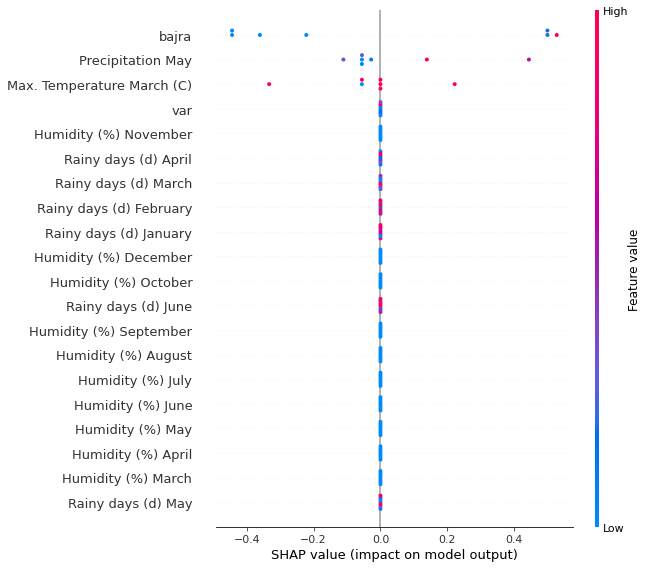

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [15]:
# Cluster 1
col_target = 'Cluster_1'
# Assign train and test data
x = states_kharif[col_features].to_numpy()
y = states_kharif[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

In [16]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
# ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
# shap_values = ex(x_test)
# shap.summary_plot(shap_values, x_test)

In [17]:
# Cluster 2
col_target = 'Cluster_2'
# Assign train and test data
x = states_kharif[col_features].to_numpy()
y = states_kharif[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

In [18]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
# ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
# shap_values = ex(x_test)
# shap.summary_plot(shap_values, x_test)

In [19]:
# Cluster 3
col_target = 'Cluster_3'
# Assign train and test data
x = states_kharif[col_features].to_numpy()
y = states_kharif[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

In [20]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
# ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
# shap_values = ex(x_test)
# shap.summary_plot(shap_values, x_test)

In [21]:
# Cluster 4
col_target = 'Cluster_4'
# Assign train and test data
x = states_kharif[col_features].to_numpy()
y = states_kharif[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

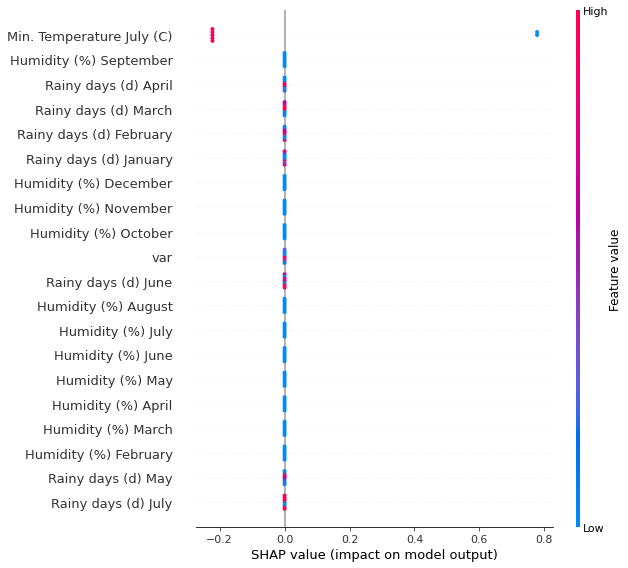

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

Rabi

In [23]:
col_features = states_rabi.columns.tolist()[11:-5]

In [24]:
states_rabi = states_rabi.fillna(0)

In [25]:
# Cluster 0
col_target = 'Cluster_0'
# Assign train and test data
x = states_rabi[col_features].to_numpy()
y = states_rabi[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

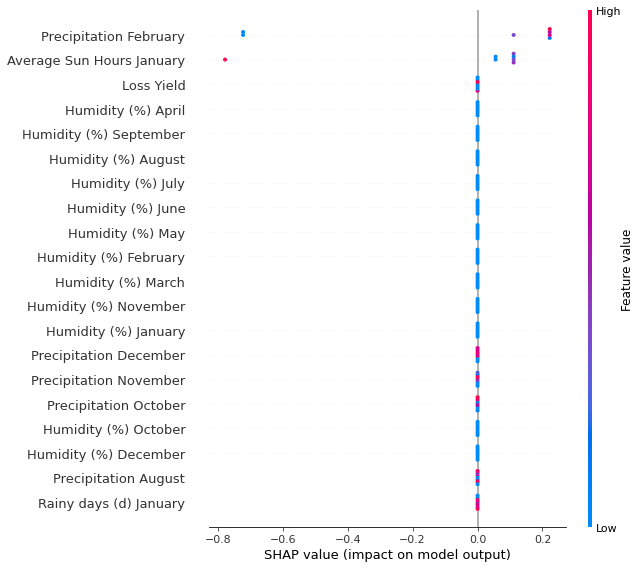

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [27]:
# Cluster 1
col_target = 'Cluster_1'
# Assign train and test data
x = states_rabi[col_features].to_numpy()
y = states_rabi[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [29]:
# Cluster 2
col_target = 'Cluster_2'
# Assign train and test data
x = states_rabi[col_features].to_numpy()
y = states_rabi[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [31]:
# Cluster 3
col_target = 'Cluster_3'
# Assign train and test data
x = states_rabi[col_features].to_numpy()
y = states_rabi[col_target].to_numpy()

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
regressor.score(x, y)

1.0

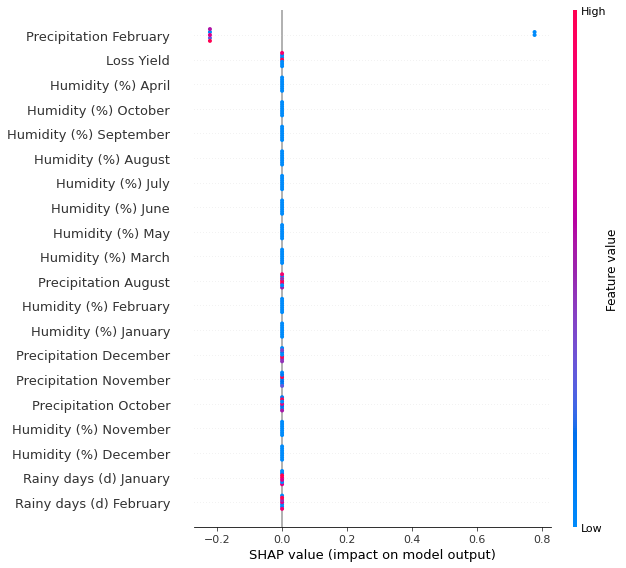

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y)
ex = shap.Explainer(regressor.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

<hr/>
<h3>Free level</h3>

In [33]:
# add variance of crops - kharif
crops_col = df_kharif.columns.tolist()[96:-3]
df_crops = df_kharif[crops_col]
df_crops.replace(0, np.nan, inplace=True)
df_crops['var'] = df_crops.var(axis=1)
df_kharif['var'] = df_crops['var']


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
# add variance of crops - rabi
crops_col = df_rabi.columns.tolist()[96:-3]
df_crops = df_rabi[crops_col]
df_crops.replace(0, np.nan, inplace=True)
df_crops['var'] = df_crops.var(axis=1)
df_rabi['var'] = df_crops['var']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
df_kharif['Cluster'].unique()

array([0., 4., 1., 3., 2.])

In [36]:
df_kharif['Cluster_0'] = df_kharif.apply(lambda x: 1 if x.Cluster == 0 else 0, axis=1)
df_kharif['Cluster_1'] = df_kharif.apply(lambda x: 1 if x.Cluster == 1 else 0, axis=1)
df_kharif['Cluster_2'] = df_kharif.apply(lambda x: 1 if x.Cluster == 2 else 0, axis=1)
df_kharif['Cluster_3'] = df_kharif.apply(lambda x: 1 if x.Cluster == 3 else 0, axis=1)
df_kharif['Cluster_4'] = df_kharif.apply(lambda x: 1 if x.Cluster == 4 else 0, axis=1)

In [37]:
df_rabi['Cluster'].unique()

array([0., 4., 1., 2., 3.])

In [38]:
df_rabi['Cluster_0'] = df_rabi.apply(lambda x: 1 if x.Cluster == 0 else 0, axis=1)
df_rabi['Cluster_1'] = df_rabi.apply(lambda x: 1 if x.Cluster == 1 else 0, axis=1)
df_rabi['Cluster_2'] = df_rabi.apply(lambda x: 1 if x.Cluster == 2 else 0, axis=1)
df_rabi['Cluster_3'] = df_rabi.apply(lambda x: 1 if x.Cluster == 3 else 0, axis=1)
df_rabi['Cluster_4'] = df_rabi.apply(lambda x: 1 if x.Cluster == 4 else 0, axis=1)

Kharif

In [39]:
col_features = df_kharif.columns.tolist()[11:-5]

In [40]:
df_kharif = df_kharif.fillna(0)

In [41]:
# Cluster 0
col_target = 'Cluster_0'
# Assign train and test data
x = df_kharif[col_features].to_numpy()
y = df_kharif[col_target].to_numpy()

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x, y)
regr.score(x, y)


0.7103420125118687

Permutation explainer: 1785it [03:09,  8.89it/s]                                


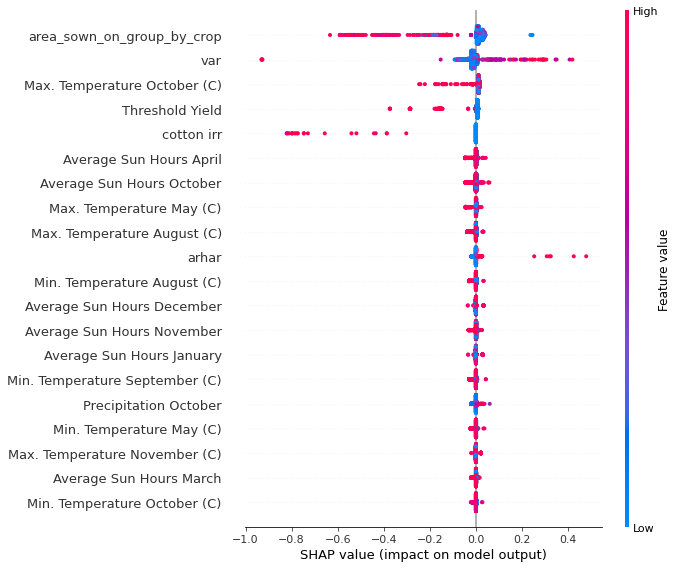

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(regr.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [43]:
# Cluster 0
col_target = 'Cluster_0'
# Assign train and test data
x = df_kharif[col_features].to_numpy()
y = df_kharif[col_target].to_numpy()

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
clf.score(x, y)

0.9329549048060124

Permutation explainer: 1785it [00:46, 30.08it/s]                                


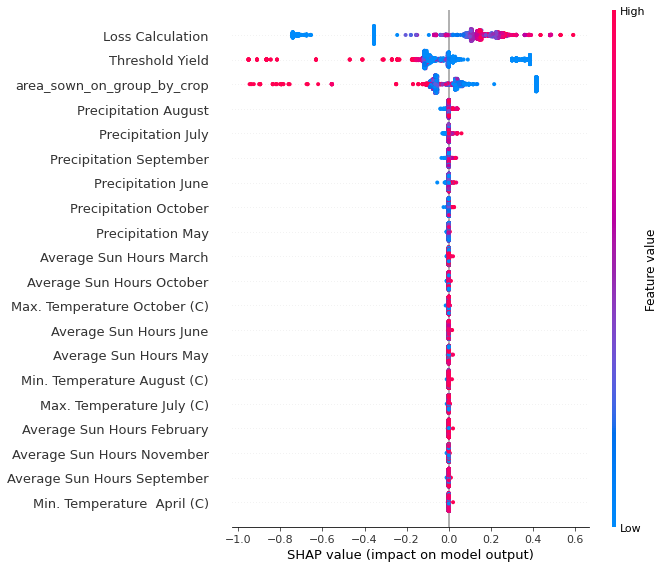

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(clf.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [45]:
# Cluster 1
col_target = 'Cluster_1'
# Assign train and test data
x = df_kharif[col_features].to_numpy()
y = df_kharif[col_target].to_numpy()

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
clf.score(x, y)

0.9620143581554637

Permutation explainer: 1785it [00:50, 27.86it/s]                                


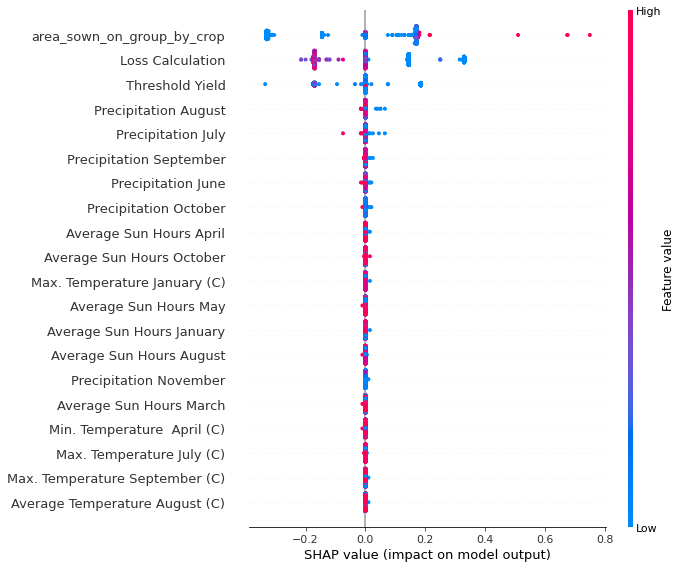

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(clf.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [47]:
# Cluster 2
col_target = 'Cluster_2'
# Assign train and test data
x = df_kharif[col_features].to_numpy()
y = df_kharif[col_target].to_numpy()

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
clf.score(x, y)

0.9744661668300144

Permutation explainer: 1785it [00:51, 28.14it/s]                                


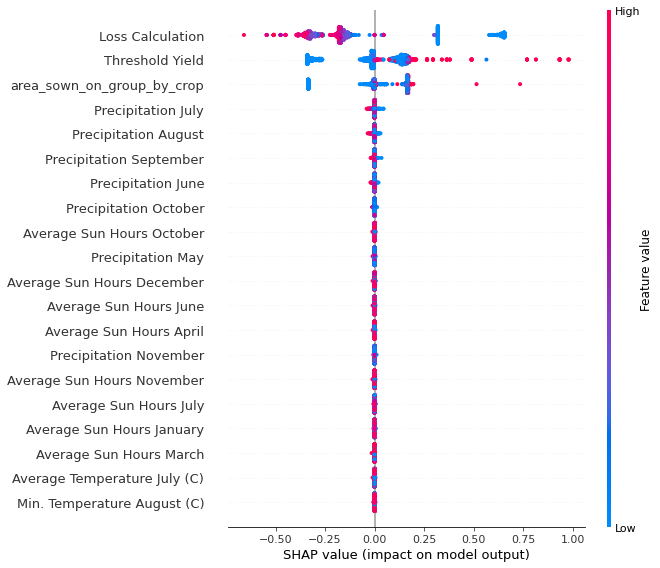

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(clf.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [49]:
# Cluster 3
col_target = 'Cluster_3'
# Assign train and test data
x = df_kharif[col_features].to_numpy()
y = df_kharif[col_target].to_numpy()

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
clf.score(x, y)

0.989364827677464

Permutation explainer: 1785it [00:51, 26.96it/s]                                


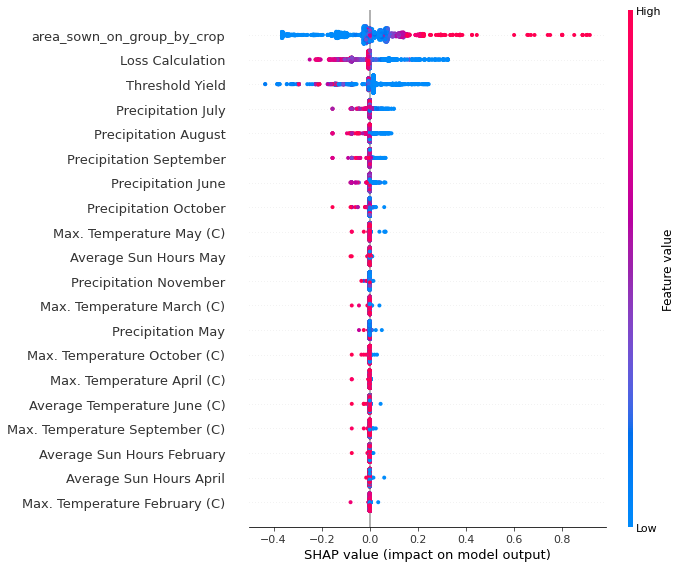

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(clf.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [51]:
# Cluster 4
col_target = 'Cluster_4'
# Assign train and test data
x = df_kharif[col_features].to_numpy()
y = df_kharif[col_target].to_numpy()

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
clf.score(x, y)

0.9832398475819673

Permutation explainer: 1785it [00:54, 26.35it/s]                                


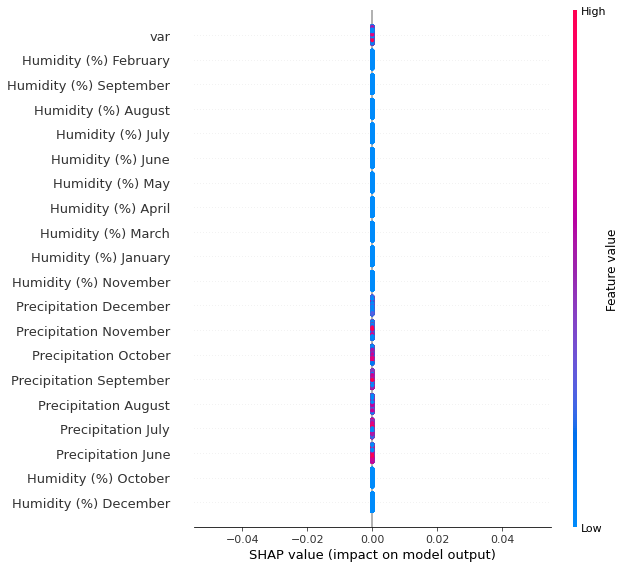

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(clf.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

Rabi

In [53]:
col_features = df_rabi.columns.tolist()[11:-5]

In [54]:
df_rabi.columns.tolist()[11:-5]

['Average Temperature January (C)',
 'Average Temperature February (C)',
 'Average Temperature March (C)',
 'Average Temperature April (C)',
 'Average Temperature May (C)',
 'Average Temperature June (C)',
 'Average Temperature July (C)',
 'Average Temperature August (C)',
 'Average Temperature September (C)',
 'Average Temperature October (C)',
 'Average Temperature November (C)',
 'Average Temperature December (C)',
 'Min. Temperature January (C)',
 'Min. Temperature February (C)',
 'Min. Temperature March (C)',
 'Min. Temperature  April (C)',
 'Min. Temperature May (C)',
 'Min. Temperature June (C)',
 'Min. Temperature July (C)',
 'Min. Temperature August (C)',
 'Min. Temperature September (C)',
 'Min. Temperature October (C)',
 'Min. Temperature November (C)',
 'Min. Temperature December (C)',
 'Max. Temperature January (C)',
 'Max. Temperature February (C)',
 'Max. Temperature March (C)',
 'Max. Temperature April (C)',
 'Max. Temperature May (C)',
 'Max. Temperature June (C)',
 'M

In [55]:
df_rabi = df_rabi.fillna(0)

In [56]:
# Cluster 0
col_target = 'Cluster_0'
# Assign train and test data
x = df_rabi[col_features].to_numpy()
y = df_rabi[col_target].to_numpy()

# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegressionCV

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
# clf.score(x, y)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x, y)
regr.score(x, y)

1.0

Permutation explainer: 907it [02:03,  6.72it/s]                                 


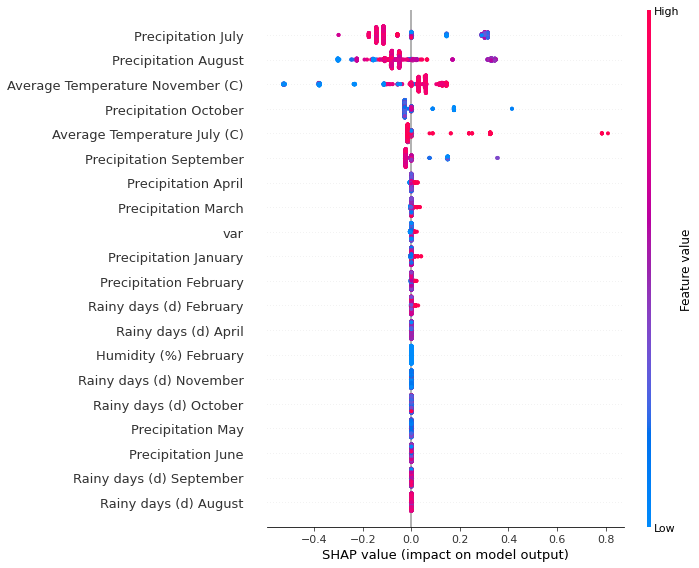

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(regr.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [58]:
# Cluster 1
col_target = 'Cluster_1'
# Assign train and test data
x = df_rabi[col_features].to_numpy()
y = df_rabi[col_target].to_numpy()

# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegressionCV

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
# clf.score(x, y)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x, y)
regr.score(x, y)

0.9939973373760321

Permutation explainer: 907it [01:59,  6.93it/s]                                 


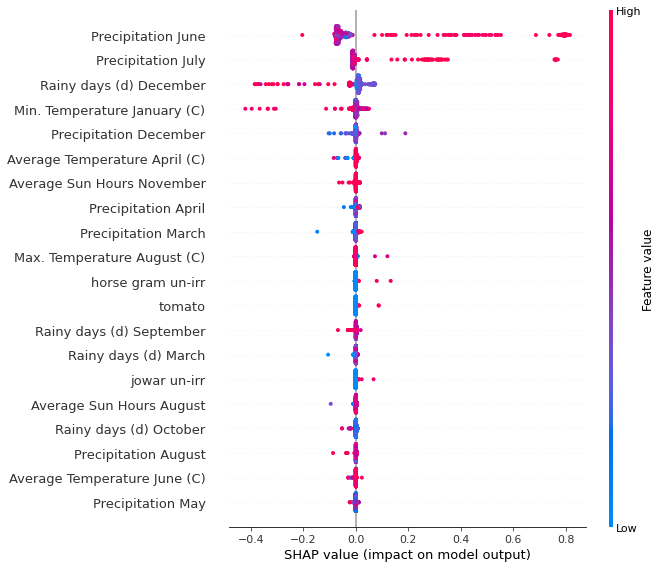

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(regr.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [60]:
# Cluster 2
col_target = 'Cluster_2'
# Assign train and test data
x = df_rabi[col_features].to_numpy()
y = df_rabi[col_target].to_numpy()

# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegressionCV

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
# clf.score(x, y)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x, y)
regr.score(x, y)

0.9973783379220214

Permutation explainer: 907it [02:25,  5.80it/s]                                 


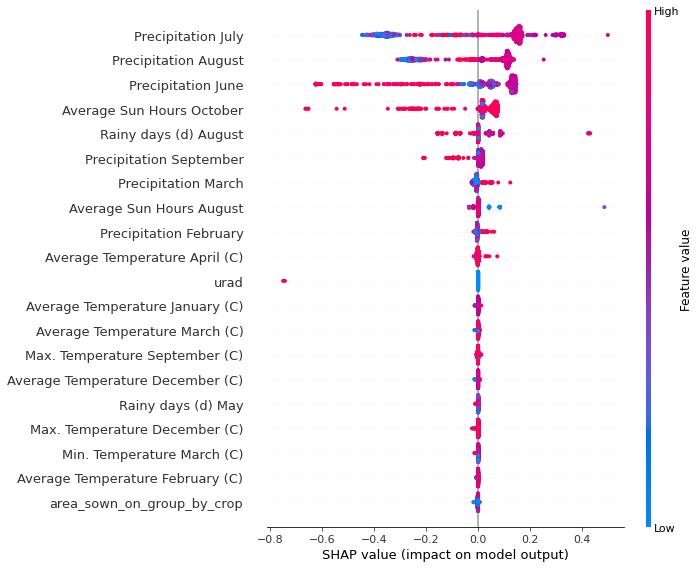

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(regr.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [62]:
# Cluster 3
col_target = 'Cluster_3'
# Assign train and test data
x = df_rabi[col_features].to_numpy()
y = df_rabi[col_target].to_numpy()

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x, y)
regr.score(x, y)

# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegressionCV

# clf = LogisticRegressionCV(cv=10, random_state=0).fit(x, y)
# clf.score(x, y)

1.0

Permutation explainer: 907it [01:29,  8.96it/s]                                 


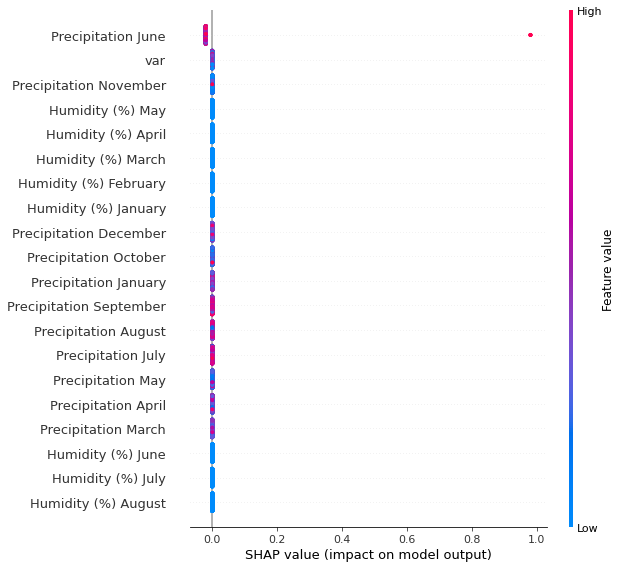

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(regr.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [64]:
# Cluster 4
col_target = 'Cluster_4'
# Assign train and test data
x = df_rabi[col_features].to_numpy()
y = df_rabi[col_target].to_numpy()

# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegressionCV

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
# clf.score(x, y)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x, y)
regr.score(x, y)

1.0

Permutation explainer: 907it [01:40,  8.07it/s]                                 


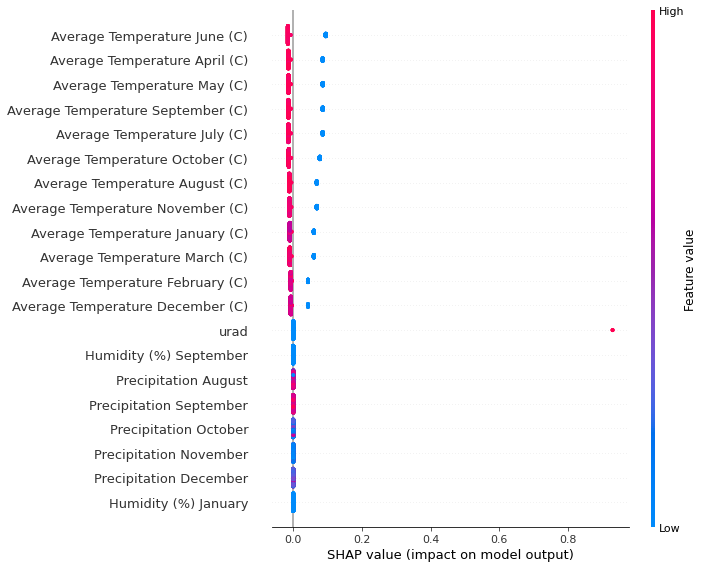

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
ex = shap.Explainer(regr.predict, x_train, feature_names=col_features)
shap_values = ex(x_test)
shap.summary_plot(shap_values, x_test)

In [66]:
# Cluster 4
col_target = 'Cluster_4'
# Assign train and test data
x = df_rabi[col_features].to_numpy()
y = df_rabi[col_target].to_numpy()

# from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0).fit(x, y)
clf.score(x, y)

# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=5, random_state=0)
# regr.fit(x, y)
# regr.score(x, y)

0.8756807611273801

In [96]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.004, stratify=y)
# ex = shap.Explainer(clf.predict, x_train, feature_names=col_features)
# shap_values = ex(x_test)
# shap.summary_plot(shap_values, x_test)